<a href="https://colab.research.google.com/github/abidshafee/predictionModel/blob/master/diabetes_prediction_tf_neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
csv_data = 'https://raw.githubusercontent.com/abidshafee/predictionModel/master/diabetes.csv'

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(csv_data)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.columns[:-1] #all columns excluding the Outcome

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [7]:
len(df.columns[:-1])

8

In [8]:
df[df['Outcome']==1] # return a dataframe where Outcome is 1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


### Class-wise Data Distribution

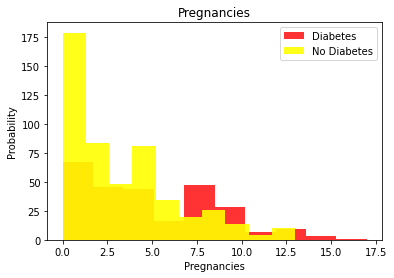

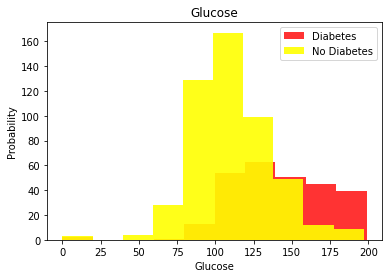

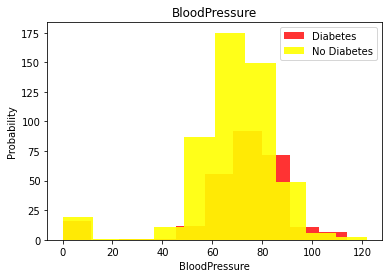

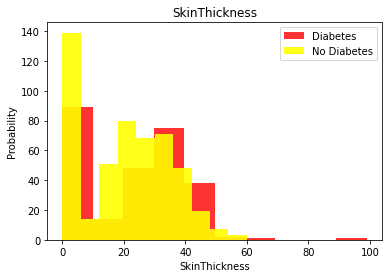

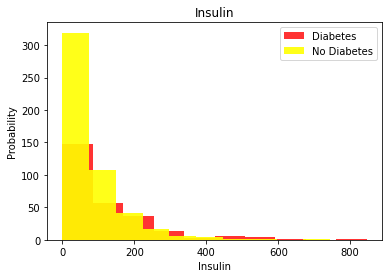

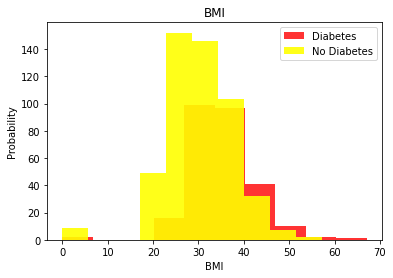

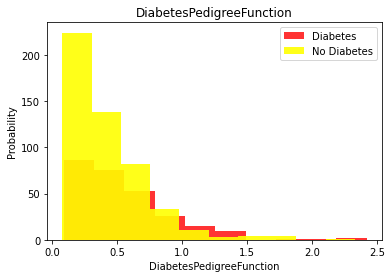

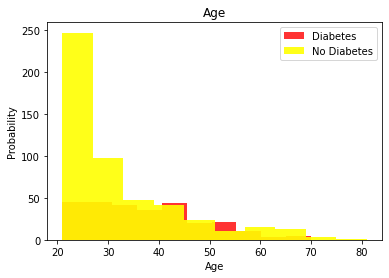

In [9]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='red', label='Diabetes', alpha=0.8)
  plt.hist(df[df['Outcome']==0][label], color='yellow', label='No Diabetes', alpha = 0.9)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

In [10]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

In [11]:
X = df.iloc[:, 0:-1].values

In [12]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [13]:
y = df.iloc[:,-1].values

In [14]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [28]:
# Scaling X into Standard deviation range
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [29]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### Creating Scalled DataFrame

In [48]:
X.shape, y.shape

((768, 8), (768,))

In [49]:
data = np.hstack((X, np.reshape(y, (-1, 1))))

In [46]:
scaled_df = pd.DataFrame(data, columns=df.columns)

In [47]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0


### ploting Scalled data distribution in standard deviation range

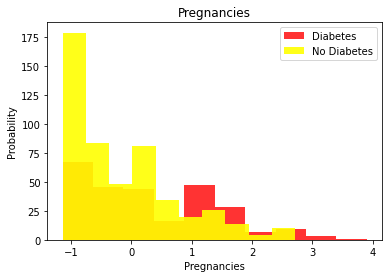

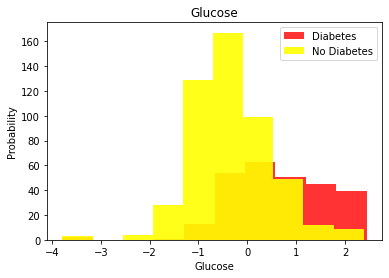

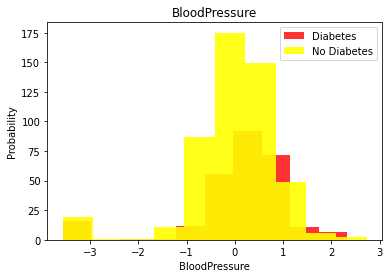

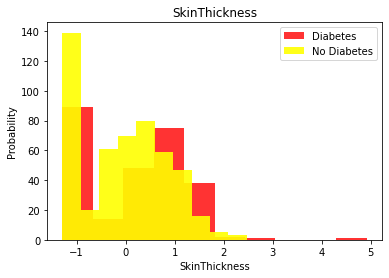

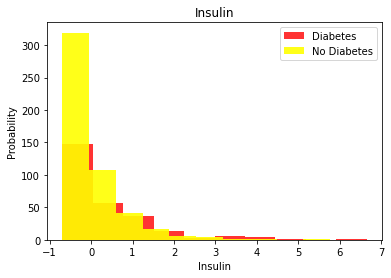

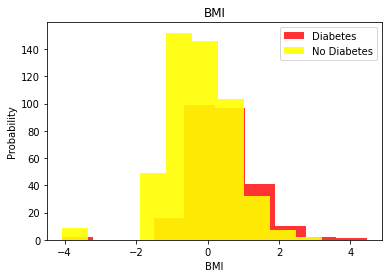

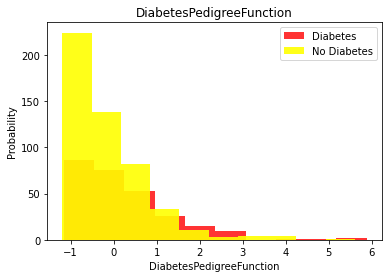

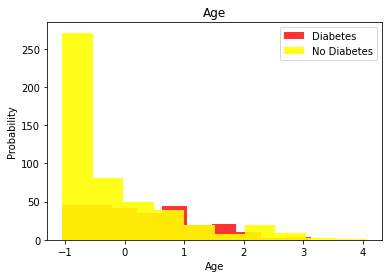

In [50]:
for i in range(len(df.columns[:-1])):
  label = scaled_df.columns[i]
  plt.hist(scaled_df[scaled_df['Outcome']==1][label], color='red', label='Diabetes', alpha=0.8)
  plt.hist(scaled_df[scaled_df['Outcome']==0][label], color='yellow', label='No Diabetes', alpha = 0.9)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

### tf neural net

In [30]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=11)

In [31]:
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [32]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation= 'relu'),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss = tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])

In [34]:
model.evaluate(x_train, y_train)
# model.fit(x_train, y_train)

17/17 [==============================] - 0s 2ms/step - loss: 0.7220 - accuracy: 0.4655


[0.7219682335853577, 0.4655493497848511]

In [35]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
34/34 [==============================] - 1s 4ms/step - loss: 0.6907 - accuracy: 0.5866 - val_loss: 0.6860 - val_accuracy: 0.6435
Epoch 2/20
34/34 [==============================] - 0s 3ms/step - loss: 0.6390 - accuracy: 0.6462 - val_loss: 0.6412 - val_accuracy: 0.6435
Epoch 3/20
34/34 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.6574 - val_loss: 0.6077 - val_accuracy: 0.6609
Epoch 4/20
34/34 [==============================] - 0s 3ms/step - loss: 0.5761 - accuracy: 0.6667 - val_loss: 0.5777 - val_accuracy: 0.6870
Epoch 5/20
34/34 [==============================] - 0s 3ms/step - loss: 0.5536 - accuracy: 0.6909 - val_loss: 0.5531 - val_accuracy: 0.7043
Epoch 6/20
34/34 [==============================] - 0s 3ms/step - loss: 0.5339 - accuracy: 0.7169 - val_loss: 0.5309 - val_accuracy: 0.7130
Epoch 7/20
34/34 [==============================] - 0s 3ms/step - loss: 0.5170 - accuracy: 0.7207 - val_loss: 0.5102 - val_accuracy: 0.7217
Epoch 8/20
34/34 [==

In [36]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.5174 - accuracy: 0.7845


[0.5173590183258057, 0.7844827771186829]

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


### Save the trained model

In [38]:
model.save("diabetes_pred_nnmodel.h5")

### Load the trained Model

In [40]:
new_model = tf.keras.models.load_model("diabetes_pred_nnmodel.h5")

In [42]:
new_model.evaluate(x_test, y_test, verbose=2)

4/4 - 0s - loss: 0.5174 - accuracy: 0.7845 - 46ms/epoch - 11ms/step


[0.5173590183258057, 0.7844827771186829]